## selenium을 사용한 이유

requests가 아닌 selenium을 사용한 이유는 본 분석에서는 검색 결과를 나중에 불러오기 때문이다.

# 2007-2016년에 걸쳐 10년 동안 가장 많은 인기를 받은 가수는?

## 크롬 띄우기

In [3]:
from selenium.webdriver import Chrome

In [4]:
browser = Chrome()

## 엠넷 주소 불러오기

In [7]:
browser.get('http://www.mnet.com/')

## 종합차트로 가기

In [8]:
button = browser.find_element_by_css_selector('#gnbspotArea > nav > div > ul.gnb > li:nth-child(2) > a')

In [9]:
button.click()

## 연간 클릭

In [14]:
yearbutton = browser.find_element_by_css_selector('#content > div.music_sort_date > ul.type > li.last > a > span')

In [15]:
yearbutton.click()

## 원하는 연도 선택

In [16]:
wantyearbutton = browser.find_element_by_css_selector('#content > div.music_sort_date > ul.date > li.day > span')

In [17]:
wantyearbutton.click()

## 2007년 부터 시작

In [18]:
startyearbutton = browser.find_element_by_css_selector('#calendarType > ul > li:nth-child(1) > a')

In [19]:
startyearbutton.click()

## implicitly_wait

브라우저가 로딩이 끝날 때까지 최대 몇 초간 기다리도록 설정

In [20]:
browser.implicitly_wait(3)  # 로딩이 끝날 때까지 최대 3초간 대기

## 가수 이름

In [21]:
titles = browser.find_elements_by_css_selector('a.MMLIInfo_Artist')

In [22]:
len(titles)

52

## ※문제점 및 해결

-> 처음에는 10년간 유행해온 노래들의 제목에 자주 들어가는 단어가 무엇인가? 를 배경으로 두고 
시작하여 클래스를 a.MMLI_Song를 잡고 하였으나 이 링크는 바로 노래재생으로 이어지는 포맷이라서 링크를 불러오면
그 포맷이 깨져서 나오기 때문에 분석을 실행할 수없었습니다. 그래서 주제를 조금 바꿔 '10년간 어떤 가수가 가장 많은 인기를 끌었나?'로 수정하여
분석을 진행하게 되었습니다.

## 링크 불러오기

In [23]:
for title in titles:
    print(title.get_attribute('href'))

http://www.mnet.com/artist/146122
http://www.mnet.com/artist/132028
http://www.mnet.com/artist/54645
http://www.mnet.com/artist/5728
http://www.mnet.com/artist/16062
http://www.mnet.com/artist/55691
http://www.mnet.com/artist/146420
http://www.mnet.com/artist/31132
http://www.mnet.com/artist/133824
http://www.mnet.com/artist/4858
http://www.mnet.com/artist/5728
http://www.mnet.com/artist/2158
http://www.mnet.com/artist/146122
http://www.mnet.com/artist/77256
http://www.mnet.com/artist/78773
http://www.mnet.com/artist/69770
http://www.mnet.com/artist/4164
http://www.mnet.com/artist/77256
http://www.mnet.com/artist/83334
http://www.mnet.com/artist/81317
http://www.mnet.com/artist/7763
http://www.mnet.com/artist/74551
http://www.mnet.com/artist/4446
http://www.mnet.com/artist/1597
http://www.mnet.com/artist/13152
http://www.mnet.com/artist/55691
http://www.mnet.com/artist/49176
http://www.mnet.com/artist/47333
http://www.mnet.com/artist/46486
http://www.mnet.com/artist/70496
http://www.mn

## 다음 연도로 가기

In [24]:
nxt = browser.find_element_by_css_selector('#content > div.music_sort_date > ul.date > li.next > a')  # Next 링크를 찾는다

In [25]:
browser.execute_script("arguments[0].scrollIntoView()", nxt)  # next 링크로 화면을 스크롤 시킨다

WebDriverException: Message: unknown error: call function result missing 'value'
  (Session info: chrome=66.0.3359.181)
  (Driver info: chromedriver=2.33.506120 (e3e53437346286c0bc2d2dc9aa4915ba81d9023f),platform=Windows NT 10.0.17134 x86_64)


In [26]:
nxt.click()  # Next 링크를 클릭

In [27]:
time.sleep(2)  # 검색 결과가 다 뜰 때까지 2초간 기다린다.

NameError: name 'time' is not defined

## 가수 이름 따오기

In [ ]:
import requests
import lxml.html

In [ ]:
url = 'http://www.mnet.com/artist/146122'

In [29]:
res = requests.get(url)

In [30]:
root = lxml.html.fromstring(res.text)

In [31]:
body = root.cssselect('.song_name')

In [32]:
body[0].text_content()

'FTISLAND'

## 여러 페이지 가수 이름 긁기

In [34]:
articles = []  # 가수 이름을 저장할 리스트
for page in range(10):  # 2페이지까지
    titles = browser.find_elements_by_css_selector('a.MMLIInfo_Artist')  # 가수 이름 찾기
    for title in titles:
        url = title.get_attribute('href')  # 가수 이름 주소
        res = requests.get(url)  # requests로 가수 이름 가져오기
        root = lxml.html.fromstring(res.text)  # HTML 처리
        body = root.cssselect('.song_name')  # body 클래스 선택
        if body:  # body가 존재하는 경우에만
            articles.append(body[0].text_content())  # 텍스트 내용 가져오기
    
    nxt = browser.find_element_by_css_selector('#content > div.music_sort_date > ul.date > li.next > a')
    browser.execute_script("arguments[0].scrollIntoView()", nxt)  # next 링크로 화면을 스크롤 시킨다
    nxt.click()
    time.sleep(3)

NameError: name 'time' is not defined

In [50]:
len(articles)

529

In [51]:
articles

['FTISLAND',
 'BIGBANG',
 'SG워너비',
 '양파',
 'MC몽',
 '씨야(SeeYa)',
 '지아',
 '최현준',
 '원더걸스',
 'The One (더원)',
 '양파',
 '제이(J.ae)',
 'FTISLAND',
 'M.C THE MAX',
 '리쌍(LeeSSang)',
 '이승기',
 '오종혁',
 'M.C THE MAX',
 'V.O.S',
 '엠투엠(M To M)',
 '휘성(Realslow)',
 '이루',
 '바비 킴',
 '박효신',
 '렉시',
 '씨야(SeeYa)',
 '남규리',
 '윤하',
 '아이비',
 '버즈',
 '백지영',
 '손호영',
 '브라운아이드걸스',
 '제드',
 '블랙펄',
 '블랙펄',
 '에이트(8Eight)',
 '이수(ISU)',
 '원티드(Wanted)',
 '이정',
 '구정현(Goodbye Sadness)',
 '지아',
 'EVAN 에반(유호석)',
 'MC 스나이퍼',
 '신혜성',
 '하하',
 'FTISLAND',
 '원티드(Wanted)',
 '이정',
 '거미',
 '브라운 아이즈',
 '먼데이키즈(Monday Kiz)',
 '원더걸스',
 'BIGBANG',
 '동방신기',
 'BIGBANG',
 '브라운아이드걸스',
 '브라운아이드걸스',
 '태연 (TAEYEON)',
 '쥬얼리(Jewelry)',
 '박지헌',
 '환희',
 '태연 (TAEYEON)',
 '원더걸스',
 '먼데이키즈(Monday Kiz)',
 '손담비',
 'BIGBANG',
 '다비치',
 '비(Rain)',
 'BIGBANG',
 '김종국',
 '소녀시대',
 '나몰라패밀리(Namolla Family) ',
 'BIGBANG',
 '백지영',
 '비(Rain)',
 '다비치',
 '다비치',
 '지아',
 '이효리',
 '김범수',
 '브라운아이드걸스',
 '브라운아이드걸스',
 '2AM',
 '먼데이키즈(Monday Kiz)',
 'SG워너비',
 '이효리',
 '하하',
 '에픽하이 (E

## 가수 이름 빈도 수 조회

In [52]:
from konlpy.tag import Komoran

In [53]:
tagger = Komoran()

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
def get_noun(body):
    nouns = tagger.nouns(body)
    return [n for n in nouns if len(n) > 1]  # 2글자 이상인 명사만 추출

In [56]:
cv = CountVectorizer(stop_words=None, analyzer=get_noun, max_features=1000)

In [5]:
tdm = cv.fit_transform(articles)

NameError: name 'cv' is not defined

In [58]:
import numpy

In [59]:
import operator

In [60]:
words = cv.get_feature_names()

In [61]:
count_mat = tdm.sum(axis=0)

In [62]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [63]:
word_count = list(zip(words, count))

In [64]:
word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True)

In [65]:
word_count

[('다비치', 18),
 ('2NE1', 14),
 ('허각', 11),
 ('T-ara', 9),
 ('티아라', 9),
 ('백지영', 8),
 ('버스커 버스커', 8),
 ('씨스타', 8),
 ('원더걸스', 8),
 ('브라운아이드걸스', 7),
 ('포미닛', 7),
 ('거미', 6),
 ('소녀시대', 6),
 ('케이윌', 6),
 ('포맨', 6),
 ('G-DRAGON', 5),
 ('걸스데이', 5),
 ('리쌍', 5),
 ('소유', 5),
 ('시크릿', 5),
 ('에일리', 5),
 ('임창정', 5),
 ('카라', 5),
 ('SG워너비', 4),
 ('Zion.T', 4),
 ('매드 클라운', 4),
 ('먼데이키즈', 4),
 ('산이', 4),
 ('씨야', 4),
 ('악동뮤지션', 4),
 ('여자친구', 4),
 ('태연', 4),
 ('G.NA', 3),
 ('MC몽', 3),
 ('나얼', 3),
 ('노을', 3),
 ('더원', 3),
 ('박효신', 3),
 ('손담비', 3),
 ('슈프림팀', 3),
 ('애프터스쿨', 3),
 ('에이트', 3),
 ('에이핑크', 3),
 ('울랄라세션', 3),
 ('윤미래', 3),
 ('이스', 3),
 ('이승기', 3),
 ('이승철', 3),
 ('이하이', 3),
 ('이효리', 3),
 ('정은지', 3),
 ('지코', 3),
 ('태양', 3),
 ('Maroon 5', 2),
 ('SS501', 2),
 ('V.O.S', 2),
 ('김범수', 2),
 ('디셈버', 2),
 ('로이킴', 2),
 ('마마무', 2),
 ('마이티 마우스', 2),
 ('바비 킴', 2),
 ('박봄', 2),
 ('배치기', 2),
 ('백아연', 2),
 ('브라운 아이즈', 2),
 ('블랙펄', 2),
 ('비스트', 2),
 ('샤이니', 2),
 ('슈퍼주니어', 2),
 ('씨스타19', 2),
 ('양파', 2),
 ('에픽하이', 2),
 (

## WordCloud

In [66]:
%matplotlib inline

In [67]:
from matplotlib import pyplot
from wordcloud import WordCloud

In [68]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)

In [69]:
cloud = wc.fit_words(dict(word_count))

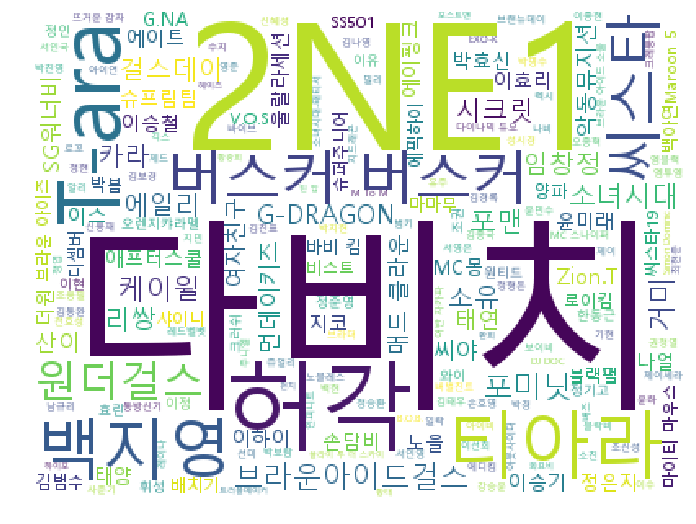

In [70]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

In [1]:
import numpy

In [2]:
tdm = numpy.load('tdm_small.npy')

In [3]:
tdm = tdm.tolist()

In [4]:
tdm

<5347x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 652672 stored elements in Compressed Sparse Column format>